In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


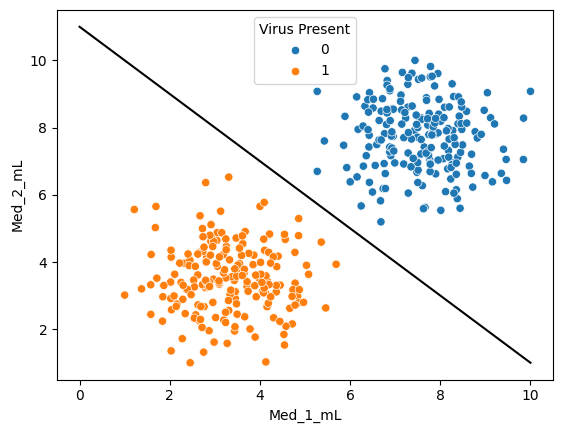

In [18]:
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present');

# линия
x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x+b 

plt.plot(x, y, c='black');

In [20]:
from sklearn.svm import SVC

help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [48]:
y = df['Virus Present']
X = df.drop('Virus Present', axis=1)

model = SVC(kernel='linear', C=1000)
model.fit(X,y)

SVC(C=1000, kernel='linear')

/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


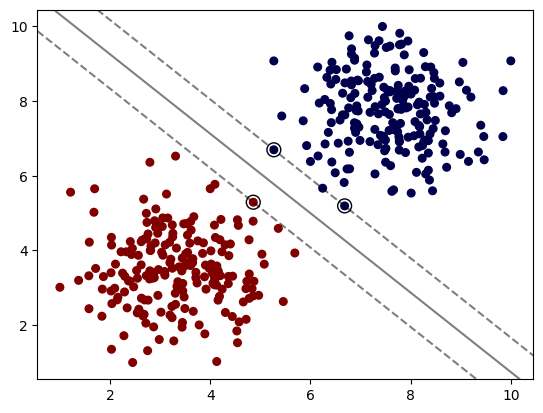

In [49]:
from svm_margin_plot import plot_svm_boundary

plot_svm_boundary(model=model, X=X, y=y)

/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


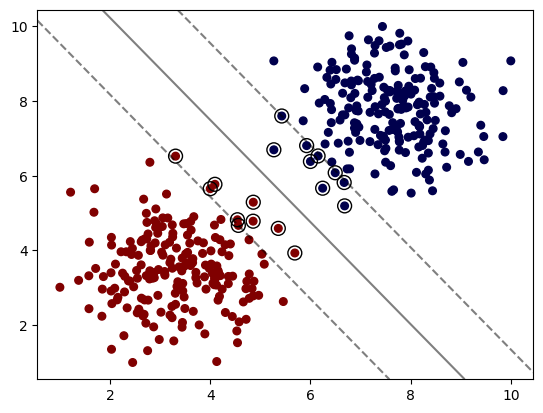

In [51]:
model_2 = SVC(kernel='linear', C=0.05)
model_2.fit(X,y)

plot_svm_boundary(model=model_2, X=X, y=y)

/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


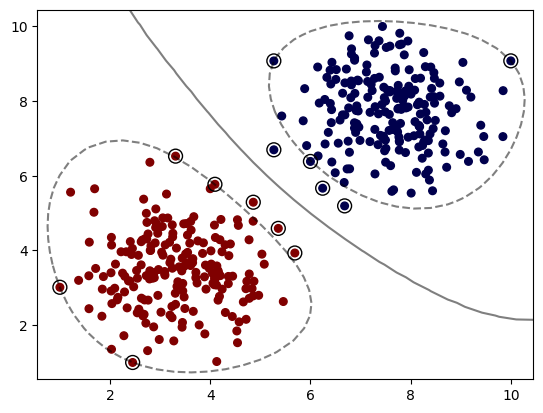

In [52]:
model_rbf = SVC(kernel='rbf', C=1)
model_rbf.fit(X,y)

plot_svm_boundary(model_rbf, X, y)

/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


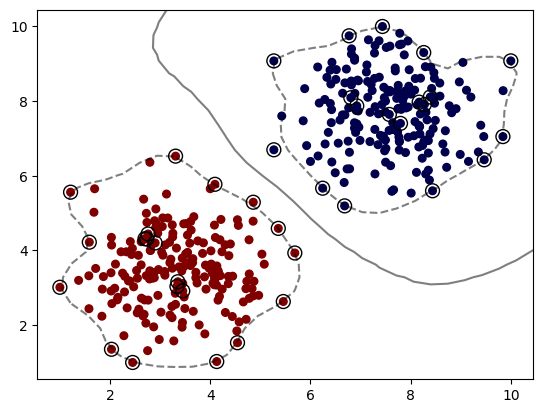

In [81]:
model_rbf = SVC(kernel='rbf', C=1, gamma='auto')
model_rbf.fit(X,y)

plot_svm_boundary(model_rbf, X, y)

/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


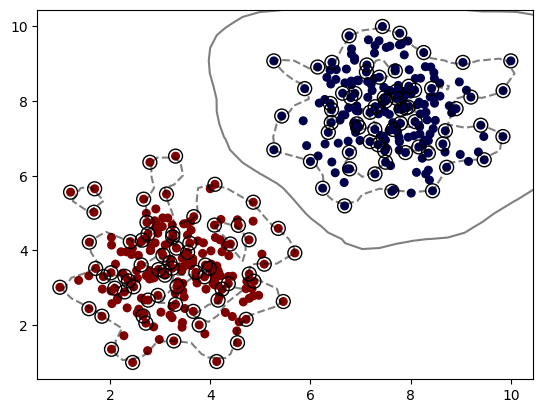

In [83]:
model_rbf = SVC(kernel='rbf', C=1, gamma=2)
model_rbf.fit(X,y)

plot_svm_boundary(model_rbf, X, y)

/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


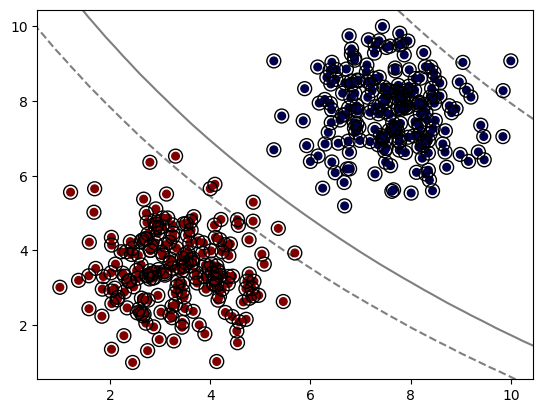

In [85]:
model_rbf = SVC(kernel='sigmoid')
model_rbf.fit(X,y)

plot_svm_boundary(model_rbf, X, y)

/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


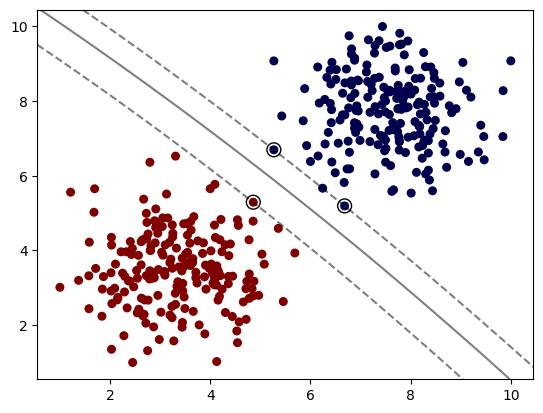

In [90]:
model_rbf = SVC(kernel='poly', degree=4, C=0.05)
model_rbf.fit(X,y)

plot_svm_boundary(model_rbf, X, y)

In [92]:
from sklearn.model_selection import GridSearchCV

svm = SVC()

param_grid = {'C':[0.01, 0.1,1],
              'kernel': ['linear', 'rbf']}

grid = GridSearchCV(estimator=svm, param_grid=param_grid)
grid.fit(X,y)

grid.best_params_

{'C': 0.01, 'kernel': 'linear'}